<div style="background-color: #061d49 ;border: 3px solid #e2ebfd; padding: 10px">
    <center>
        <font size=6 color=#ffffff>
            <b>
                Title
            </b>
        </font>
    </center>
</div>

<div style="border: 2px solid #e2ebfd ; padding: 10px">
    <font size=3 color= #061d49>
        <b>
            Purpose - 
        </b>
        <br>
            To clean and mine the provided data sets to gain insights into the physicochemical, pharmacokinetic, bioavailability, and absorption properties and relationships of the compounds presented.
        <br>
        <br>
        <b>
            Table of Contents - 
        </b>
            <br> 1) Import Data Sets
            <br> 2) Exploratory Data Analysis    
        <div style="padding-left: 20px">
 i. Data Preprocessing
            <br> ii. Physicochemical Properties and Bioavailability Relationship Exploration
            <br> iii. In Vitro to In Vivo Properties/Relationships
            <br> iv. Primary Potency and Selectivity (Off-Target Bioactivity)
        </div>
    </font>
</div>

<div style="background-color: #e2ebfd ;border: 2px solid #bad0f9; padding: 10px">
    <center>
        <font size=5 color= #061d49>
            <b>
                Import Data Sets
            </b>
        </font>
    </center>
</div>

In [47]:
# Import packages

import numpy as np
import pandas as pd
import glob
import os
import chardet
import csv

import warnings
warnings.filterwarnings('ignore')

In [48]:
folder_path = r'C:\Users\tktow\OneDrive\Documents\AbbVie Interview\DataSources'

# Use glob to find all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Create a dictionary to store dataframes with the filenames (without extension) as keys
dataframes = {}

for file in csv_files:
    try:
        # Detect file encoding
        with open(file, 'rb') as f:
            result = chardet.detect(f.read())
        encoding = result['encoding']
        # Extract the filename without the extension to use as the key
        key = os.path.splitext(os.path.basename(file))[0]
        # Read the CSV file into a dataframe with detected encoding
        dataframes[key] = pd.read_csv(file, encoding=encoding)
    except UnicodeDecodeError:
        print(f"Encoding error for file: {file}")
    except Exception as e:
        print(f"An error occurred while reading {file}: {e}")

# Display the keys to verify the dataframes have been loaded
print("Loaded DataFrames:", list(dataframes.keys()))

An error occurred while reading C:\Users\tktow\OneDrive\Documents\AbbVie Interview\DataSources\Gene_Drug_Adverse_Event_Relationships.csv: Error tokenizing data. C error: Expected 1 fields in line 396, saw 2

Loaded DataFrames: ['Compound_Off_Target_Activity', 'Project_Level_Data']


In [49]:
# Access a specific dataframe by its key
project_level_data_df = dataframes.get('Project_Level_Data')
if project_level_data_df is not None:
    print("Project_Level_Data DataFrame:")
    print(project_level_data_df.head())

compound_off_target_activity_df = dataframes.get('Compound_Off_Target_Activity')
if compound_off_target_activity_df is not None:
    print("Compound_Off_Target_Activity DataFrame:")
    print(compound_off_target_activity_df.head())

Project_Level_Data DataFrame:
  CompoundID\tPrimary_Target_Assay\tPrimary_Target_Assay_BioActivity\tMW\tMolecular_Weight\tTPSA\tClogP\tLogD\tNum_H_Donors\tNum_H_Acceptors\tNum_AromaticRings\tF_SP3\tDrug_Class\tCell Permeability\tCmpd Solubility (uM)\tfafg (Rat)\tBioavailability (Rat)\t"Clint  \
0  CM-1622017\tJAK1 EC50(uM)\t0.259\t389.45\t\t79...                                                                                                                                                                                                                     
1  CM-1749952\tJAK1 EC50(uM)\t0.312\t461.99\t\t89...                                                                                                                                                                                                                     
2  CM-1749952\tJAK1 EC50(uM)\t0.312\t461.99\t\t89...                                                                                                                        

<div class="alert alert-block alert-warning"><font size=2 color=black><i>
    The two loaded dataframes appear to use the tab character (\t) as the delimiter.
    <br>
    <br>Next: Explore loading/read issue with Gene_Drug_Adverse_Event_Relationship.csv
    </i></font></div>

In [50]:
file_path = 'C:/Users/tktow/OneDrive/Documents/AbbVie Interview/DataSources/Gene_Drug_Adverse_Event_Relationships.csv'

# Detect the file encoding
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())
encoding = result['encoding']

# Preprocess and read the CSV file
rows = []
with open(file_path, 'r', encoding=encoding) as file:
    reader = csv.reader(file)
    header = next(reader)  # Get the header
    for row in reader:
        if len(row) == len(header):  # Check if the number of columns matches the header
            rows.append(row)

# Create a dataframe
gene_drug_adverse_event_relationships = pd.DataFrame(rows, columns=header)
print("DataFrame loaded successfully")

# Display the dataframe
gene_drug_adverse_event_relationships.head()

DataFrame loaded successfully


,GeneSymbol\tEnsembl ID\tEntrezGene\tae\tthresholdset\tgene_count\tdrug_count\tae_count\tdrugs_with_ae\tbioactive_drugs
0,CSF1R\tENSG00000182578\t\tPlatelet count abnor...
1,CSF1R\tENSG00000182578\t\tUrine output decreas...
2,CSF1R\tENSG00000182578\t\tThermal burn\t11\t31...
3,CSF1R\tENSG00000182578\t\tOliguria\t11\t3175\t...
4,CSF1R\tENSG00000182578\t\tHypercholesterolaemi...


<div class="alert alert-block alert-warning"><font size=2 color=black>
    <i>
    All files appear to use a tab character (\t) as a delimiter.
        <br>
        <br>
        Parse all files in data source folder based on '\t' as separator and using chardet to detect encoding type.
    </i>
</font></div>

In [51]:
# Define the folder path containing CSV files
folder_path = 'C:/Users/tktow/OneDrive/Documents/AbbVie Interview/DataSources'

# Use glob to find all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Create a dictionary to store dataframes with the filenames (without extension) as keys
dataframes = {}

for file in csv_files:
    try:
        # Detect file encoding
        with open(file, 'rb') as f:
            result = chardet.detect(f.read())
        encoding = result['encoding']
        
        # Extract the filename without the extension to use as the key
        key = os.path.splitext(os.path.basename(file))[0]
        
        # Read the CSV file into a dataframe with detected encoding
        # Assuming the files are tab-separated
        dataframes[key] = pd.read_csv(file, encoding=encoding, sep='\t')
        print(f"{key} DataFrame loaded successfully")
    except UnicodeDecodeError:
        print(f"Encoding error for file: {file}")
    except Exception as e:
        print(f"An error occurred while reading {file}: {e}")

# Display the keys to verify the dataframes have been loaded
print("Loaded DataFrames:", list(dataframes.keys()))

Compound_Off_Target_Activity DataFrame loaded successfully
Gene_Drug_Adverse_Event_Relationships DataFrame loaded successfully
Project_Level_Data DataFrame loaded successfully
Loaded DataFrames: ['Compound_Off_Target_Activity', 'Gene_Drug_Adverse_Event_Relationships', 'Project_Level_Data']


In [52]:
# Access a specific dataframe by its key
if 'Gene_Drug_Adverse_Event_Relationships' in dataframes:
    gene_drug_adverse_event_relationships = dataframes['Gene_Drug_Adverse_Event_Relationships']
    
if 'Compound_Off_Target_Activity' in dataframes:
    compound_off_target_activity = dataframes['Compound_Off_Target_Activity']
    
if 'Project_Level_Data' in dataframes:
    project_level_data = dataframes['Project_Level_Data']

In [53]:
gene_drug_adverse_event_relationships.head()

,GeneSymbol,Ensembl ID,EntrezGene,ae,thresholdset,gene_count,drug_count,ae_count,drugs_with_ae,bioactive_drugs
0,CSF1R,ENSG00000182578,NaN,Platelet count abnormal,11,3175,4905,2381,53,144
1,CSF1R,ENSG00000182578,NaN,Urine output decreased,11,3175,4905,2381,137,144
2,CSF1R,ENSG00000182578,NaN,Thermal burn,11,3175,4905,2381,113,144
3,CSF1R,ENSG00000182578,NaN,Oliguria,11,3175,4905,2381,246,144
4,CSF1R,ENSG00000182578,NaN,Hypercholesterolaemia,11,3175,4905,2381,352,144


In [54]:
compound_off_target_activity.head()

,CompoundID,Gene Target,pIC50
0,CM-212452,Abl,5.50
1,CM-212452,ACVR1,5.33
2,CM-212452,Akt1,5.39
3,CM-212452,ALK,5.32
4,CM-212452,Aurora1,5.26


In [55]:
project_level_data.head()

,CompoundID,Primary_Target_Assay,Primary_Target_Assay_BioActivity,MW,Molecular_Weight,TPSA,ClogP,LogD,Num_H_Donors,Num_H_Acceptors,Num_AromaticRings,F_SP3,Drug_Class,Cell Permeability,Cmpd Solubility (uM),fafg (Rat),Bioavailability (Rat),"Clint,mic (L/hr/kg) (Rat)"
0,CM-1622017,JAK1 EC50(uM),0.259,389.45,NaN,79.59,3.586,3.5863,1,7,3.0,0.36364,UNKNOWN,41.7,86.7,NaN,NaN,3.24
1,CM-1749952,JAK1 EC50(uM),0.312,461.99,NaN,89.36,2.132,1.3643,2,9,2.0,0.68182,UNKNOWN,NaN,NaN,NaN,NaN,NaN
2,CM-1749952,JAK1 EC50(uM),0.312,461.99,NaN,89.36,2.132,1.3643,2,9,2.0,0.68182,UNKNOWN,NaN,NaN,NaN,NaN,NaN
3,CM-1749702,JAK1 EC50(uM),3.000,386.49,NaN,97.12,1.995,1.9948,3,8,2.0,0.65000,UNKNOWN,NaN,NaN,NaN,NaN,NaN
4,CM-1749701,JAK1 EC50(uM),3.000,385.51,NaN,80.13,2.524,1.7222,2,8,2.0,0.65000,UNKNOWN,NaN,NaN,NaN,NaN,NaN


-------------------------------------------------------------------------------------------------------------------------------

<div style="background-color: #9bbaf7 ; border: 2px solid #76a1fa; padding: 10px">
    <center>
        <font size=5 color=#061d49>
            <b>
                Exploratory Data Analysis
            </b>
        </font>
    </center>
</div>

<div style="background-color: #F0F5FE ; border: 2px solid #76a1fa ; padding: 10px">
    <font size=4 color=#061d49>
        <center>
            <b>
                Data Preprocessing
            </b>
        </center>
    </font>
</div>

First, in the data set 'Project Level Data' the columns MW and Molecular_Weight both contain molecular weight data.
1. Coalesce MW & Molecular_Weight columns
2. Update column name to include unit of measurement - atomic mass unit (amu)

In [57]:
# Coalesce 'MW' and 'Molecular_Weight' into a new column 'Molecular_Weight (amu)'
project_level_data['Molecular_Weight (amu)'] = project_level_data['MW'].fillna(project_level_data['Molecular_Weight'])

# Drop the original columns, no longer needed
project_level_data_df = project_level_data.drop(columns=['MW', 'Molecular_Weight'])

# Display the dataframe to verify
project_level_data_df.head()

,CompoundID,Primary_Target_Assay,Primary_Target_Assay_BioActivity,TPSA,ClogP,LogD,Num_H_Donors,Num_H_Acceptors,Num_AromaticRings,F_SP3,Drug_Class,Cell Permeability,Cmpd Solubility (uM),fafg (Rat),Bioavailability (Rat),"Clint,mic (L/hr/kg) (Rat)",Molecular_Weight (amu)
0,CM-1622017,JAK1 EC50(uM),0.259,79.59,3.586,3.5863,1,7,3.0,0.36364,UNKNOWN,41.7,86.7,NaN,NaN,3.24,389.45
1,CM-1749952,JAK1 EC50(uM),0.312,89.36,2.132,1.3643,2,9,2.0,0.68182,UNKNOWN,NaN,NaN,NaN,NaN,NaN,461.99
2,CM-1749952,JAK1 EC50(uM),0.312,89.36,2.132,1.3643,2,9,2.0,0.68182,UNKNOWN,NaN,NaN,NaN,NaN,NaN,461.99
3,CM-1749702,JAK1 EC50(uM),3.000,97.12,1.995,1.9948,3,8,2.0,0.65000,UNKNOWN,NaN,NaN,NaN,NaN,NaN,386.49
4,CM-1749701,JAK1 EC50(uM),3.000,80.13,2.524,1.7222,2,8,2.0,0.65000,UNKNOWN,NaN,NaN,NaN,NaN,NaN,385.51


<div style="border: 1px solid #9bbaf7 ; padding: 10px">  
    <font size=3 color=#061d49>
        <center>
            <b>
                Identify Null Proportions in Dataframes
            </b>
        </center>
    </font>
</div>

In [58]:
# List of current dataframes
dataframes2 = {'Compound_Off_Target_Activity': compound_off_target_activity,
               'Gene_Drug_Adverse_Event_Relationships': gene_drug_adverse_event_relationships,
               'Project_Level_Data': project_level_data_df}

# Function to calculate the proportion of null values in each column of a dataframe
def null_proportion(df):
    return df.isnull().mean()

# Calculate the proportion of null values for each dataframe
null_proportions = {key: null_proportion(df) for key, df in dataframes2.items()}

# Display the proportion of null values for each dataframe
for key, nulls in null_proportions.items():
    print(f"Proportion of null values in {key}:")
    print(nulls)
    print("\n")

Proportion of null values in Compound_Off_Target_Activity:
CompoundID     0.0
Gene Target    0.0
pIC50          0.0
dtype: float64


Proportion of null values in Gene_Drug_Adverse_Event_Relationships:
GeneSymbol         0.006119
Ensembl ID         0.338218
EntrezGene         0.281146
ae                 0.000000
thresholdset       0.000000
gene_count         0.000000
drug_count         0.000000
ae_count           0.000000
drugs_with_ae      0.000000
bioactive_drugs    0.000000
dtype: float64


Proportion of null values in Project_Level_Data:
CompoundID                          0.000000
Primary_Target_Assay                0.000000
Primary_Target_Assay_BioActivity    0.010196
TPSA                                0.000000
ClogP                               0.000000
LogD                                0.010196
Num_H_Donors                        0.000000
Num_H_Acceptors                     0.000000
Num_AromaticRings                   0.000408
F_SP3                               0.000408
Dru

<div style="border: 1px solid #9bbaf7 ; padding: 10px">   
    <font size=3 color=#061d49>
        <center>
            <b>
                Fill Gene_Drug_Adverse_Event_Relationships Nulls
            </b>
        </center>
    </font>
</div>

<font size=3 color=black>
            Gene Symbols, Ensembl IDs, and Entrez Gene IDs are all unique identifiers. So, missing information can be filled using matching info in other rows or from online databases like Gene (NCBI).
</font>

In [59]:
# Create mappings
gene_to_ensembl = gene_drug_adverse_event_relationships.dropna(subset=['GeneSymbol', 'Ensembl ID']).set_index('GeneSymbol')['Ensembl ID'].to_dict()
gene_to_entrez = gene_drug_adverse_event_relationships.dropna(subset=['GeneSymbol', 'EntrezGene']).set_index('GeneSymbol')['EntrezGene'].to_dict()
ensembl_to_entrez = gene_drug_adverse_event_relationships.dropna(subset=['Ensembl ID', 'EntrezGene']).set_index('Ensembl ID')['EntrezGene'].to_dict()
ensembl_to_gene = gene_drug_adverse_event_relationships.dropna(subset=['Ensembl ID', 'GeneSymbol']).set_index('Ensembl ID')['GeneSymbol'].to_dict()
entrez_to_gene = gene_drug_adverse_event_relationships.dropna(subset=['EntrezGene', 'GeneSymbol']).set_index('EntrezGene')['GeneSymbol'].to_dict()
entrez_to_ensembl = gene_drug_adverse_event_relationships.dropna(subset=['EntrezGene', 'Ensembl ID']).set_index('EntrezGene')['Ensembl ID'].to_dict()

# Fill missing Ensembl ID based on GeneSymbol
gene_drug_adverse_event_relationships['Ensembl ID'] = gene_drug_adverse_event_relationships.apply(
    lambda row: gene_to_ensembl.get(row['GeneSymbol'], row['Ensembl ID']), axis=1)
# Fill missing EntrezGene based on GeneSymbol
gene_drug_adverse_event_relationships['EntrezGene'] = gene_drug_adverse_event_relationships.apply(
    lambda row: gene_to_entrez.get(row['GeneSymbol'], row['EntrezGene']), axis=1)
# Fill missing EntrezGene based on Ensembl ID
gene_drug_adverse_event_relationships['EntrezGene'] = gene_drug_adverse_event_relationships.apply(
    lambda row: ensembl_to_entrez.get(row['Ensembl ID'], row['EntrezGene']), axis=1)
# Fill missing GeneSymbol based on Ensembl ID
gene_drug_adverse_event_relationships['GeneSymbol'] = gene_drug_adverse_event_relationships.apply(
    lambda row: ensembl_to_gene.get(row['Ensembl ID'], row['GeneSymbol']), axis=1)
# Fill missing GeneSymbol based on EntrezGene
gene_drug_adverse_event_relationships['GeneSymbol'] = gene_drug_adverse_event_relationships.apply(
    lambda row: entrez_to_gene.get(row['EntrezGene'], row['GeneSymbol']), axis=1)
# Fill missing Ensembl ID based on EntrezGene
gene_drug_adverse_event_relationships['Ensembl ID'] = gene_drug_adverse_event_relationships.apply(
    lambda row: entrez_to_ensembl.get(row['EntrezGene'], row['Ensembl ID']), axis=1)

Check which rows still contain null values.

In [60]:
null_proportions = gene_drug_adverse_event_relationships.isnull().mean()

print("Proportion of null values in each column:")
print(null_proportions)

Proportion of null values in each column:
GeneSymbol         0.000000
Ensembl ID         0.333025
EntrezGene         0.277752
ae                 0.000000
thresholdset       0.000000
gene_count         0.000000
drug_count         0.000000
ae_count           0.000000
drugs_with_ae      0.000000
bioactive_drugs    0.000000
dtype: float64


GeneSymbol is completely filled in now, but Ensembl ID and Entrez Gene ID are still missing for nearly 1/3 of rows. Will pull from online databases.

In [61]:
# Get unique GeneSymbol values where Ensembl ID is null
unique_gene_symbols_with_null_ensembl = gene_drug_adverse_event_relationships[gene_drug_adverse_event_relationships['Ensembl ID'].isnull()]['GeneSymbol'].unique()

# Get unique GeneSymbol where EntrezGene is null
unique_gene_symbols_with_null_entrez = gene_drug_adverse_event_relationships[gene_drug_adverse_event_relationships['EntrezGene'].isnull()]['GeneSymbol'].unique()

In [62]:
print("Unique GeneSymbol values where Ensembl ID is null:")
print(unique_gene_symbols_with_null_ensembl)

print("Unique GeneSymbol values where EntrezGene is null:")
print(unique_gene_symbols_with_null_entrez)

Unique GeneSymbol values where Ensembl ID is null:
['MAP4K1' 'MAP4K4' 'MAP4K2' 'JAK3' 'MAP4K5']
Unique GeneSymbol values where EntrezGene is null:
['CSF1R' 'MAP4K3' 'BTK' 'MAP4K4']


Used the NCBI Gene database to find the missing Entrez Gene IDs & the Ensembl to fill in the missing Ensembl IDs.

https://www.ncbi.nlm.nih.gov/gene/

https://useast.ensembl.org/index.html

In [63]:
gene_to_entrez_match = {
    'CSF1R': '1436',
    'MAP4K3': '8491',
    'BTK': '695',
    'MAP4K5': '11183',
}

gene_to_ensembl_match = {
    'MAP4K1': 'ENSG00000104814',
    'MAP4K2': 'ENSG00000168067',
    'MAP4K4': 'ENSG00000071054',
    'MAP4K5': 'ENSG00000012983',
    'JAK3': 'ENSG00000105639',
}

In [64]:
# Function to fill missing Ensembl ID values using the dictionary
def fill_missing_ensembl(row):
    if pd.isnull(row['Ensembl ID']):
        return gene_to_ensembl_match.get(row['GeneSymbol'], row['Ensembl ID'])
    return row['Ensembl ID']

# Apply the function to the dataframe
gene_drug_adverse_event_relationships['Ensembl ID'] = gene_drug_adverse_event_relationships.apply(fill_missing_ensembl, axis=1)

# Function to fill missing Entrez Gene ID values using the dictionary
def fill_missing_entrez(row):
    if pd.isnull(row['EntrezGene']):
        return gene_to_entrez_match.get(row['GeneSymbol'], row['Ensembl ID'])
    return row['Ensembl ID']

# Apply the function to the dataframe
gene_drug_adverse_event_relationships['EntrezGene'] = gene_drug_adverse_event_relationships.apply(fill_missing_ensembl, axis=1)

In [65]:
null_proportions = gene_drug_adverse_event_relationships.isnull().mean()

print("Proportion of null values in each column:")
print(null_proportions)

Proportion of null values in each column:
GeneSymbol         0.0
Ensembl ID         0.0
EntrezGene         0.0
ae                 0.0
thresholdset       0.0
gene_count         0.0
drug_count         0.0
ae_count           0.0
drugs_with_ae      0.0
bioactive_drugs    0.0
dtype: float64


<font size=3 color=black>
    <b>
        All rows are now filled in gene_drug_adverse_event_relationships.
    </b>
</font>

<div style="border: 1px solid #9bbaf7 ; padding: 10px">   
    <font size=3 color=#061d49>
        <center>
            <b>
                Remove Duplicate Rows from Dataframes
            </b>
        </center>
    </font>
</div>

In [66]:
# Function to remove duplicates and print number of rows removed
def remove_duplicates(df, df_name):
    initial_rows = df.shape[0]
    df = df.drop_duplicates()
    final_rows = df.shape[0]
    rows_removed = initial_rows - final_rows
    print(f"{df_name}:")
    print(f"Initial rows: {initial_rows}")
    print(f"Final rows: {final_rows}")
    print(f"Rows removed: {rows_removed}\n")
    return df

# Remove duplicate rows from each dataframe and print the number of rows removed
compound_off_target_activity = remove_duplicates(compound_off_target_activity, "Compound_Off_Target_Activity")
gene_drug_adverse_event_relationships = remove_duplicates(gene_drug_adverse_event_relationships, "Gene_Drug_Adverse_Event_Relationships")
project_level_data_df = remove_duplicates(project_level_data_df, "Project_Level_Data")

Compound_Off_Target_Activity:
Initial rows: 26358
Final rows: 25624
Rows removed: 734

Gene_Drug_Adverse_Event_Relationships:
Initial rows: 19449
Final rows: 19449
Rows removed: 0

Project_Level_Data:
Initial rows: 2452
Final rows: 2411
Rows removed: 41



<font size=3 color=black>
    <b>
        Project Level Data Duplicate Exploration
    </b>
</font>

Since the CompoundID is the primary key for the project level dataset, there should only be one row per CompoundID

In [67]:
total_IDs = project_level_data_df.CompoundID.count()
unique_IDs = project_level_data_df.CompoundID.nunique()

print(f"Total CompoundIDs: {total_IDs}")
print(f"Unique CompoundIDs: {unique_IDs}")

Total CompoundIDs: 2411
Unique CompoundIDs: 2385


There are 26 duplicated CompoundID values.

Next: Figure out which field(s) are making those rows duplicates and decided how/if to remove.

In [68]:
# Identify CompoundID values that are duplicated
duplicate_compound_ids = project_level_data_df['CompoundID'][project_level_data_df['CompoundID'].duplicated(keep=False)]

# Filter the dataframe to include only rows with duplicated CompoundID values
duplicate_rows = project_level_data_df[project_level_data_df['CompoundID'].isin(duplicate_compound_ids)]

# Sort the dataframe by CompoundID
duplicate_rows_sorted = duplicate_rows.sort_values(by='CompoundID')

In [69]:
duplicate_rows_sorted.CompoundID.count()

51

In [70]:
duplicate_rows_sorted.head(51)

,CompoundID,Primary_Target_Assay,Primary_Target_Assay_BioActivity,TPSA,ClogP,LogD,Num_H_Donors,Num_H_Acceptors,Num_AromaticRings,F_SP3,Drug_Class,Cell Permeability,Cmpd Solubility (uM),fafg (Rat),Bioavailability (Rat),"Clint,mic (L/hr/kg) (Rat)",Molecular_Weight (amu)
304,CM-1116725,JAK1 EC50(uM),2.58000,61.46,2.100,2.1002,1,6,3.0,0.26316,Class H,NaN,NaN,NaN,NaN,NaN,336.39
226,CM-1116725,JAK1 EC50(uM),2.58000,61.46,2.100,2.1002,1,6,3.0,0.26316,GENERAL DIVERSITY,NaN,NaN,NaN,NaN,NaN,336.39
306,CM-1117913,JAK1 EC50(uM),3.00000,52.23,1.252,-0.3681,1,5,2.0,0.46667,Class H,18.800,521.00,NaN,NaN,35.80,274.36
260,CM-1117913,JAK1 EC50(uM),3.00000,52.23,1.252,-0.3681,1,5,2.0,0.46667,GENERAL DIVERSITY,18.800,521.00,NaN,NaN,35.80,274.36
258,CM-1117923,JAK1 EC50(uM),3.00000,81.69,-0.370,-0.4500,2,7,2.0,0.50000,GENERAL DIVERSITY,NaN,545.00,NaN,NaN,2.50,318.37
305,CM-1117923,JAK1 EC50(uM),3.00000,81.69,-0.370,-0.4500,2,7,2.0,0.50000,Class H,NaN,545.00,NaN,NaN,2.50,318.37
2045,CM-1240231,JAK1 EC50(uM),0.01890,83.18,2.479,2.4792,1,6,3.0,0.41176,Class B,10.700,148.00,NaN,3.22,33.10,306.37
357,CM-1240231,JAK1 EC50(uM),0.01890,83.18,2.479,2.4792,1,6,3.0,0.41176,Class E,10.700,148.00,NaN,3.22,33.10,306.37
340,CM-1337435,JAK1 EC50(uM),0.00798,72.00,1.205,-1.6685,3,5,3.0,0.52941,Class F,1.140,473.00,NaN,NaN,4.78,295.38
792,CM-1337435,JAK1 EC50(uM),0.00798,72.00,1.205,-1.6685,3,5,3.0,0.52941,Class C,1.140,473.00,NaN,NaN,4.78,295.38


The only column where the duplicate CompoundIDs differ is Drug_Class. Will keep more "specified" class definition - meaning if the Compound ID has a class association it will choose that over General Diversity, Other, NA, etc...

In [71]:
# Sort the dataframe by 'Drug_Class' alphabetically
sorted_df = project_level_data_df.sort_values(by='Drug_Class')

In [72]:
# Get the list of columns except 'Drug_Class'
columns_to_consider = [col for col in project_level_data_df.columns if col != 'Drug_Class']

# Drop duplicates based on 'CompoundID', keeping the first occurrence
deduplicated_df = sorted_df.drop_duplicates(subset=columns_to_consider, keep='first')

In [73]:
deduplicated_df.CompoundID.count()

2385

Only unique CompoundID values remain.
<br>CompoundID is now a true primary key for the dataset.

In [74]:
# Rename the deduplicated dataframe to abbreviated project level data clean for ease of use
pld_clean_df = deduplicated_df

In [75]:
pld_clean_df.head()

,CompoundID,Primary_Target_Assay,Primary_Target_Assay_BioActivity,TPSA,ClogP,LogD,Num_H_Donors,Num_H_Acceptors,Num_AromaticRings,F_SP3,Drug_Class,Cell Permeability,Cmpd Solubility (uM),fafg (Rat),Bioavailability (Rat),"Clint,mic (L/hr/kg) (Rat)",Molecular_Weight (amu)
2451,CM-1374804,JAK1 EC50(uM),0.0147,83.79,0.806,0.8056,2,7,4.0,0.36842,2,44.90,123.0,NaN,NaN,24.9,347.42
2450,CM-152280,JAK1 EC50(uM),0.3030,145.85,3.275,-0.0001,5,10,2.0,0.48387,ANTIVIRAL AGENT,NaN,NaN,NaN,NaN,NaN,594.72
2447,CM-1222695,JAK1 EC50(uM),3.0000,101.96,2.666,2.6657,3,8,3.0,0.17647,Class A,NaN,NaN,NaN,NaN,NaN,371.82
2448,CM-1988329,JAK1 EC50(uM),3.0000,151.82,3.257,3.2130,5,12,4.0,0.28571,Class A,4.42,2.0,NaN,NaN,53.5,632.71
2420,CM-1179180,JAK1 EC50(uM),0.5250,201.27,6.427,6.1952,4,17,8.0,0.27273,Class A,NaN,NaN,NaN,NaN,NaN,1005.97


<div style="background-color: #F0F5FE ;border: 2px solid #76a1fa ; padding: 10px">
    <font size=4 color=#061d49>
        <center>
            <b>
                Physicochemical Properties and Bioavailability Relationship Exploration
            </b>
        </center>
    </font>
</div>

In the Project Level Data BioAvailability and FaFg have the most null values.

Will explore the relationships present in the limited data present to possibly impute missing data later,

In [76]:
# Import visualization packages

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<font size=3><b>Bioavailability Relationships</b></font>

<b>CLogP & Cell Permeability</b>

In [77]:
# Define the list of columns to check for null values and to keep in the final dataframe
bio_columns_to_check1 = [
    'ClogP', 'Cell Permeability'
]

bio_columns_to_keep1 = bio_columns_to_check1

# Remove rows with null values in the specified columns
pld_clean_df2 = pld_clean_df.dropna(subset=bio_columns_to_keep1)

# Select only the desired columns for the final dataframe
logP_perm_relationship_df = pld_clean_df2[bio_columns_to_keep1]

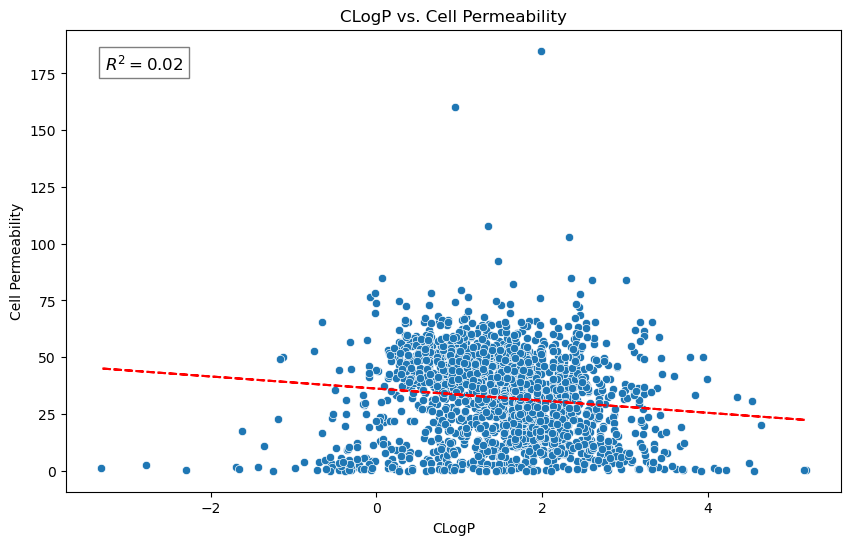

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Scatter plot: LogP vs. Cell Permeability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=logP_perm_relationship_df, x='ClogP', y='Cell Permeability')

# Fit the linear regression model
X = logP_perm_relationship_df['ClogP'].values.reshape(-1, 1)
y = logP_perm_relationship_df['Cell Permeability'].values
model = LinearRegression()
model.fit(X, y)

# Add the trendline
trendline = model.predict(X)
plt.plot(logP_perm_relationship_df['ClogP'], trendline, color='red', linestyle='--')

# Calculate and display the R^2 score
r2 = r2_score(y, trendline)
plt.text(0.05, 0.95, f'$R^2 = {r2:.2f}$', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('CLogP')
plt.ylabel('Cell Permeability')
plt.title('CLogP vs. Cell Permeability')
plt.show()

<div class="alert alert-block alert-warning">
    <font size=3 color=black>
        The above graph shows that there is almost no relationship between CLogP (the calculated LogP) and the cell permeability. This in contradictory to typical governing logic which says that LogP and cell permeability should be at least moderately positively related.
        <br>
        <br>But the above graph is using all data available for CLogP & Cell Permeability, not just those rows where the bioavailabilty is also available.
    </font>
</div>

TPSA & Cell Permeability

In [79]:
# Define the list of columns to check for null values and to keep in the final dataframe
bio_columns_to_check2 = [
    'TPSA', 'Cell Permeability'
]

bio_columns_to_keep2 = bio_columns_to_check2

# Remove rows with null values in the specified columns
pld_clean_df3 = pld_clean_df.dropna(subset=bio_columns_to_keep2)

# Select only the desired columns for the final dataframe
tpsa_perm_relationship_df = pld_clean_df3[bio_columns_to_keep2]

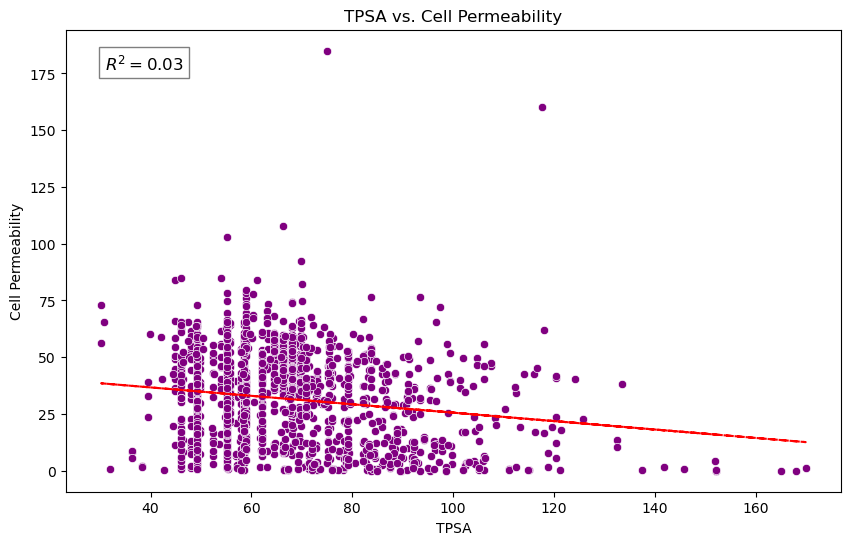

In [80]:
# Scatter plot: TPSA vs. Cell Permeability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tpsa_perm_relationship_df, x='TPSA', y='Cell Permeability', color='purple')

# Fit the linear regression model
X = tpsa_perm_relationship_df['TPSA'].values.reshape(-1, 1)
y = tpsa_perm_relationship_df['Cell Permeability'].values
model = LinearRegression()
model.fit(X, y)

# Add the trendline
trendline = model.predict(X)
plt.plot(tpsa_perm_relationship_df['TPSA'], trendline, color='red', linestyle='--')

# Calculate and display the R^2 score
r2 = r2_score(y, trendline)
plt.text(0.05, 0.95, f'$R^2 = {r2:.2f}$', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('TPSA')
plt.ylabel('Cell Permeability')
plt.title('TPSA vs. Cell Permeability')
plt.show()

<div class="alert alert-block alert-warning">
    <font size=3 color=black>
        The above graph shows that there is almost no relationship between TPSA (Topological Polar Surface Area) and the cell permeability. This in contradictory to typical governing logic which says that TPSA and cell permeability should be at least moderately negatively related - lower TPSA -> higher cell permeability.
        <br>
        <br>But the above graph is using all data available for TPSA & Cell Permeability, not just those rows where the bioavailabilty is also available.
    </font>
</div>

<b>Bioavailability & Physiochemical Properties</b>

In [81]:
# Define the list of columns to check for null values and to keep in the final dataframe
bio_columns_to_check = [
    'Primary_Target_Assay_BioActivity','TPSA', 'ClogP', 'LogD', 'Num_H_Donors','Num_H_Acceptors','Num_AromaticRings',
    'Molecular_Weight (amu)','Cell Permeability', 'Cmpd Solubility (uM)', 'Clint,mic (L/hr/kg) (Rat)',
    'Bioavailability (Rat)'
]

bio_columns_to_keep = bio_columns_to_check

# Remove rows with null values in the specified columns
pld_clean_df2 = pld_clean_df.dropna(subset=bio_columns_to_keep)

# Select only the desired columns for the final dataframe
bioavailabilty_relationship_df = pld_clean_df2[bio_columns_to_keep]

In [82]:
bioavailabilty_relationship_df.shape

(61, 12)

Correlation Matrix & Scatter Plot

In [83]:
# Calculate the correlation matrix
correlation_matrix = bioavailabilty_relationship_df.corr()

# Extract the correlation of each column with 'Bioavailability (Rat)'
bioavailability_corr = correlation_matrix['Bioavailability (Rat)'].sort_values(ascending=False)

# Display the correlation values
#print(bioavailability_corr)

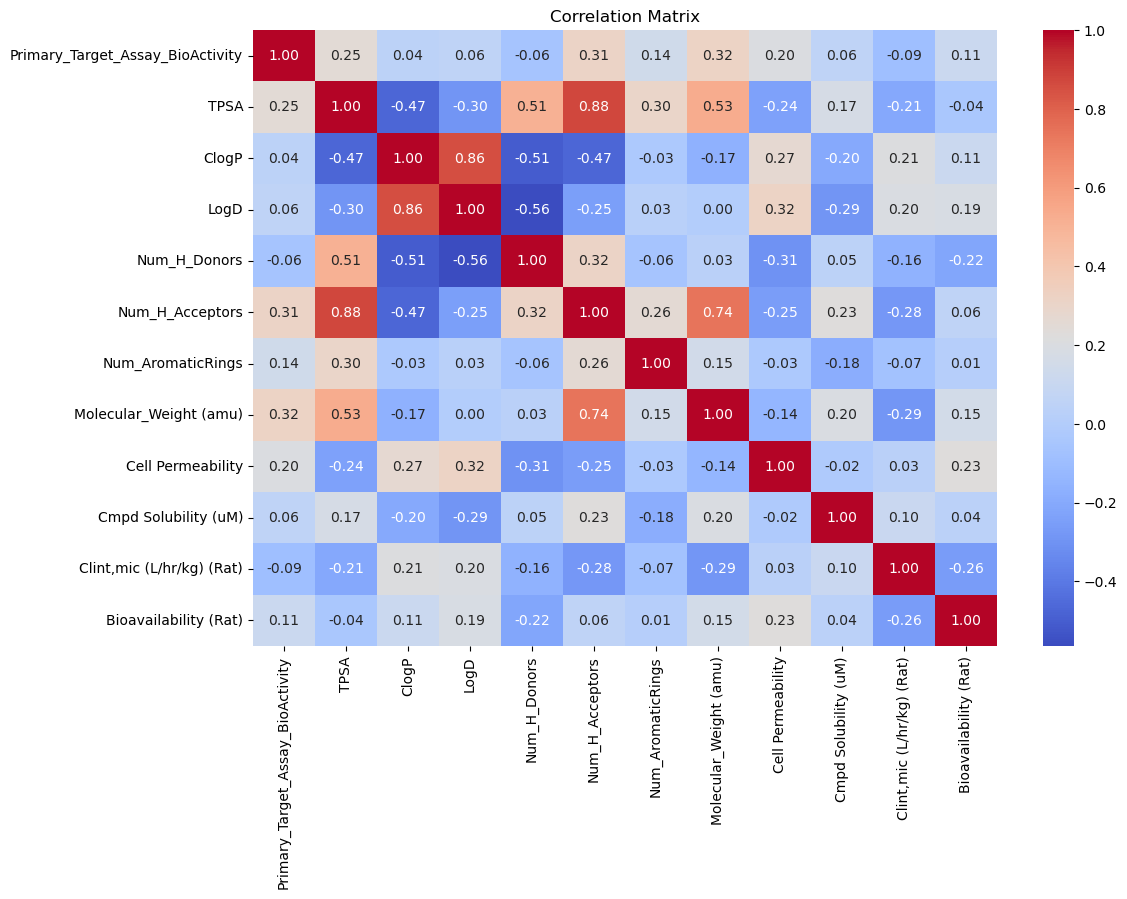

In [84]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [85]:
# Display the correlation values
print(bioavailability_corr)

Bioavailability (Rat)               1.000000
Cell Permeability                   0.225295
LogD                                0.185580
Molecular_Weight (amu)              0.154249
Primary_Target_Assay_BioActivity    0.110425
ClogP                               0.110376
Num_H_Acceptors                     0.056352
Cmpd Solubility (uM)                0.039484
Num_AromaticRings                   0.010859
TPSA                               -0.039900
Num_H_Donors                       -0.219144
Clint,mic (L/hr/kg) (Rat)          -0.262636
Name: Bioavailability (Rat), dtype: float64


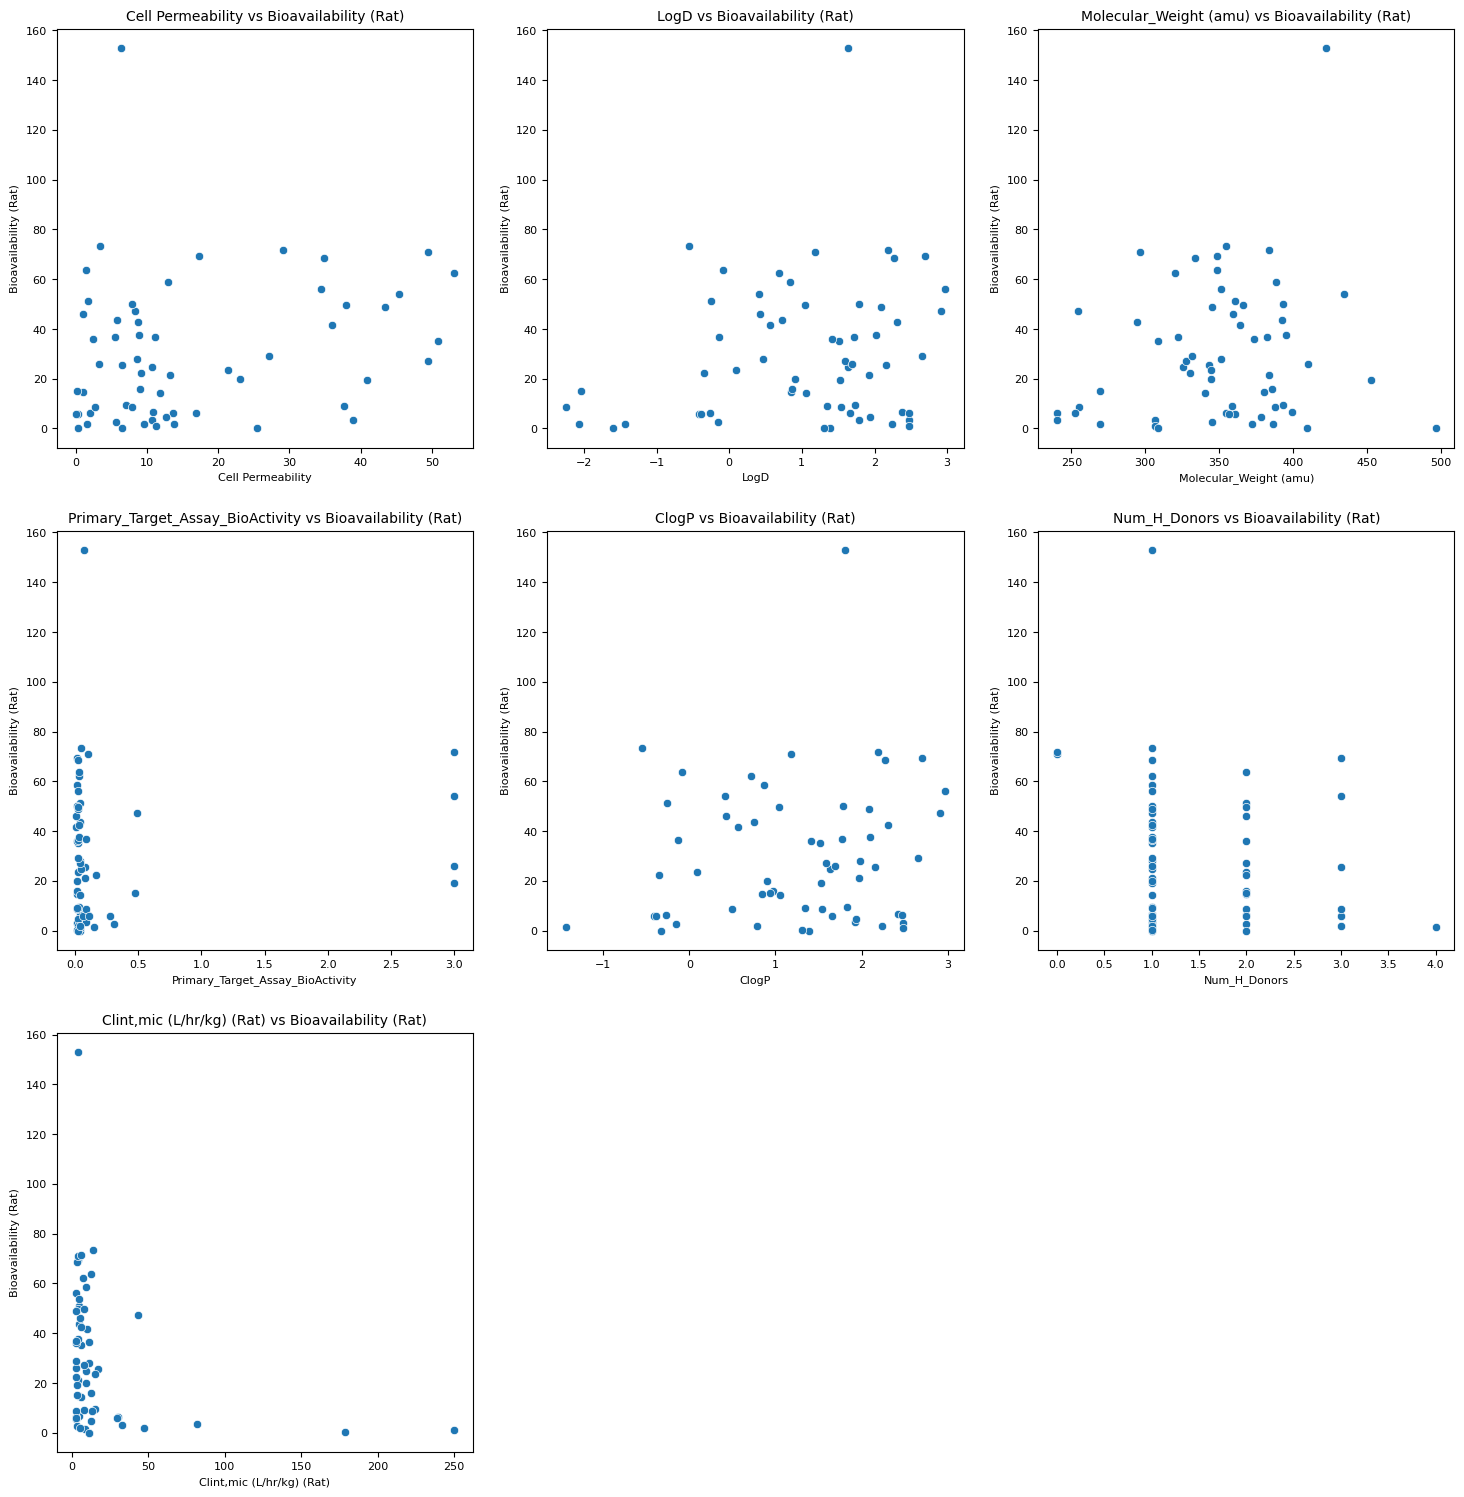

In [86]:
# Select columns for scatter plots based on notable correlations
columns = ['Cell Permeability', 'LogD', 'Molecular_Weight (amu)', 'Primary_Target_Assay_BioActivity',
           'ClogP', 'Num_H_Donors', 'Clint,mic (L/hr/kg) (Rat)']

# Visualize the scatter plots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
for col, ax in zip(columns, axes.flatten()):
    sns.scatterplot(data=bioavailabilty_relationship_df, x=col, y='Bioavailability (Rat)', ax=ax)
    ax.set_title(f'{col} vs Bioavailability (Rat)', fontsize=10)
    ax.set_xlabel(col, fontsize=8)
    ax.set_ylabel('Bioavailability (Rat)', fontsize=8)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

# Hide any empty subplots (if any)
for i in range(len(columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(pad=2.0)
plt.show()

Using the scatter plots a Bioavailability outlier seems present.

Will remove outlier(s).

In [87]:
# Update bioavialibilty_relationship_df to include only fields with at least weak to moderate correlations
corr_columns_to_keep = ['Primary_Target_Assay_BioActivity', 'ClogP', 'LogD', 'Num_H_Donors',
    'Molecular_Weight (amu)','Cell Permeability', 'Clint,mic (L/hr/kg) (Rat)','Bioavailability (Rat)']

# Remove rows with null values in the specified columns
pld_clean_df3 = pld_clean_df.dropna(subset=corr_columns_to_keep)

# Select only the desired columns for the final dataframe
bioavailabilty_relationship_df2 = pld_clean_df3[corr_columns_to_keep]

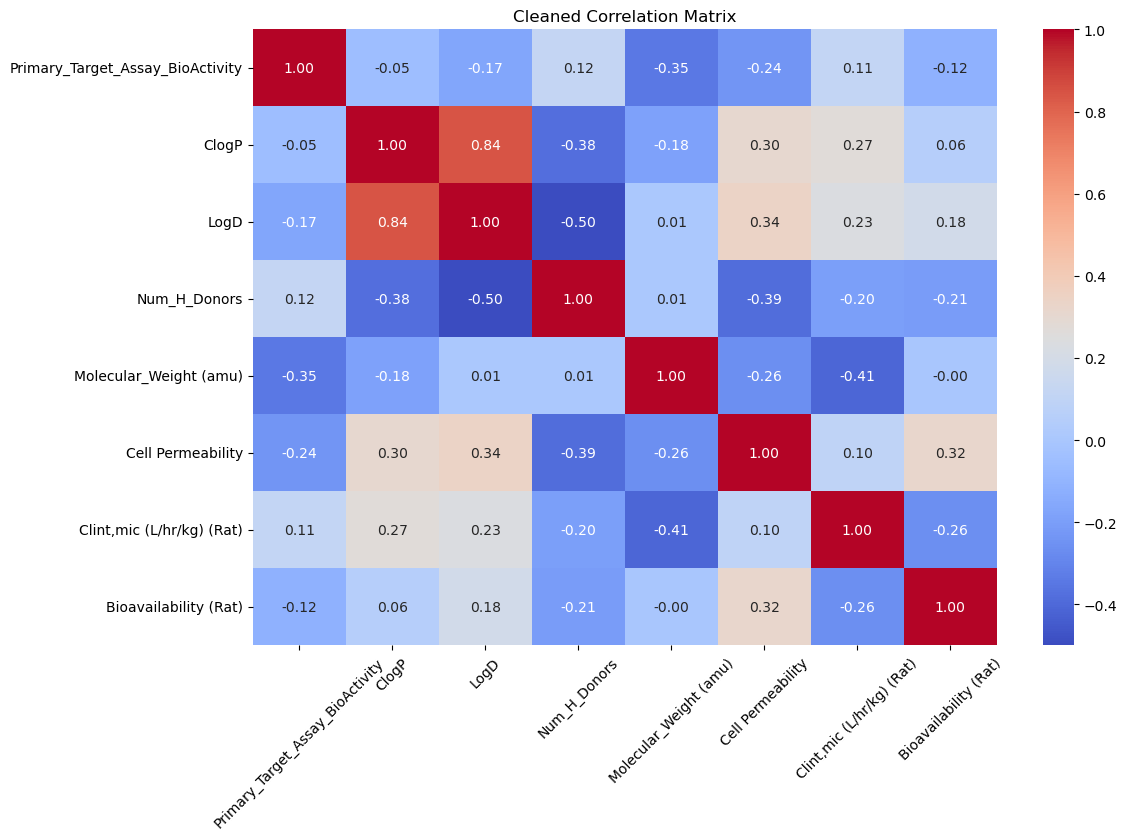

In [88]:
from scipy.stats import zscore

# Define a function to detect and remove outliers using the Z-score method
def remove_outliers_zscore(df, columns, threshold=3):
    z_scores = np.abs(zscore(df[columns]))
    filtered_entries = (z_scores < threshold).all(axis=1)
    return df[filtered_entries]

# List of columns to check for outliers
columns = ['Primary_Target_Assay_BioActivity', 'ClogP', 'LogD', 'Num_H_Donors',
    'Molecular_Weight (amu)','Cell Permeability', 'Clint,mic (L/hr/kg) (Rat)','Bioavailability (Rat)']

# Remove outliers using the Z-score method
df_cleaned = remove_outliers_zscore(bioavailabilty_relationship_df2, columns)

# Calculate the correlation matrix again
correlation_matrix_cleaned = df_cleaned.corr()

# Extract the correlation of each column with 'Bioavailability (Rat)'
bioavailability_corr_cleaned = correlation_matrix_cleaned['Bioavailability (Rat)'].sort_values(ascending=False)

# Visualize the cleaned correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cleaned Correlation Matrix')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.yticks(rotation=0)   # Ensure y-axis labels are horizontal
plt.show()

In [60]:
# Display the cleaned correlation values
print(bioavailability_corr_cleaned)

Bioavailability (Rat)               1.000000
Cell Permeability                   0.318884
LogD                                0.182455
ClogP                               0.055660
Molecular_Weight (amu)             -0.004302
Primary_Target_Assay_BioActivity   -0.117355
Num_H_Donors                       -0.207222
Clint,mic (L/hr/kg) (Rat)          -0.263068
Name: Bioavailability (Rat), dtype: float64


In [45]:
# Rename dataframe for ease
bioavailability_cleaned_df = bioavailabilty_relationship_df2

<div style="border: 2px solid #9bbaf7 ; padding: 10px">
    <font size=3 color=#061d49>
        <center>
            <b>
                Predicting Bioavailability Using Highest Correlated Features
            </b>
        </center>
    </font>
</div>

Engineer ML datasets for Bioavailability prediction:
1) Bioavailability dataset will be engineered around complete data for the fields LogD, Cell Permeability, Number of H Donors, and CLint MIC.

<b>
        Bioavailability Feature Engineering and Models
</b>

Create dataframe with only desired columns.

In [46]:
# Define the list of columns to check for null values and to keep in the final dataframe
columns_to_keep = [
    'LogD', 'Cell Permeability', 'Num_H_Donors', 'Clint,mic (L/hr/kg) (Rat)','Bioavailability (Rat)'
]

# Select only the desired columns for the final dataframe
bioavialibilty_model_df = bioavailability_cleaned_df[columns_to_keep]

In [47]:
bioavailability_cleaned_df.shape

(61, 8)

Set Up features for Linear Regression Model

In [48]:
# Separate features and target
features = bioavialibilty_model_df[['LogD', 'Cell Permeability', 'Num_H_Donors', 'Clint,mic (L/hr/kg) (Rat)']]
target = bioavialibilty_model_df['Bioavailability (Rat)']

<b>Linear Regression Model for Bioavailability<b>

Split Data - Train & Test

In [49]:
from sklearn.model_selection import train_test_split

X = bioavialibilty_model_df.drop('Bioavailability (Rat)', axis=1)
y = bioavialibilty_model_df['Bioavailability (Rat)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(48, 4) (13, 4)


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R^2 Score: {r2}')
print(f'Mean Squared Error: {mse}')

R^2 Score: 0.10288663090476668
Mean Squared Error: 644.5064617898353


<div class="alert alert-block alert-warning">
    <font size=3 color=black>
        Based on the R^2 and Mean Squared Error, the linear regression model is not able to accurately predict the bioavailability value based on the features selected.
        <br>
        <br> Will test further boosting and tuning methods to see if accuracy can be increased.
    </font>
</div>

Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

y_gb_pred = gb_model.predict(X_test)
gb_r2 = r2_score(y_test, y_gb_pred)
gb_mse = mean_squared_error(y_test, y_gb_pred)

print(f'Gradient Boosting R^2 Score: {gb_r2}')
print(f'Gradient Boosting Mean Squared Error: {gb_mse}')

Gradient Boosting R^2 Score: -0.5073564540307123
Gradient Boosting Mean Squared Error: 1082.91884650342


Lasso & Ridge Regression

In [53]:
from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_ridge_pred = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, y_ridge_pred)
ridge_mse = mean_squared_error(y_test, y_ridge_pred)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_lasso_pred = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, y_lasso_pred)
lasso_mse = mean_squared_error(y_test, y_lasso_pred)

print(f'Ridge Regression R^2 Score: {ridge_r2}')
print(f'Ridge Regression Mean Squared Error: {ridge_mse}')
print(f'Lasso Regression R^2 Score: {lasso_r2}')
print(f'Lasso Regression Mean Squared Error: {lasso_mse}')

Ridge Regression R^2 Score: 0.10218972973768126
Ridge Regression Mean Squared Error: 645.0071312937002
Lasso Regression R^2 Score: 0.10230307530051053
Lasso Regression Mean Squared Error: 644.9257012869973


Hyperparameter Tuning On Regression Model

In [54]:
# Define the hyperparameter grid for Ridge and Lasso regression
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [55]:
from sklearn.model_selection import GridSearchCV

# Grid search for Ridge regression
ridge_model = Ridge()
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid, cv=5, scoring='r2')
ridge_grid_search.fit(X_train, y_train)

# Grid search for Lasso regression
lasso_model = Lasso()
lasso_grid_search = GridSearchCV(estimator=lasso_model, param_grid=lasso_param_grid, cv=5, scoring='r2')
lasso_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [56]:
# Best parameters for Ridge and Lasso
best_ridge_params = ridge_grid_search.best_params_
best_lasso_params = lasso_grid_search.best_params_

print(f"Best Ridge Parameters: {best_ridge_params}")
print(f"Best Lasso Parameters: {best_lasso_params}")

# Train Ridge and Lasso models with best parameters
best_ridge_model = Ridge(**best_ridge_params)
best_ridge_model.fit(X_train, y_train)
y_ridge_pred = best_ridge_model.predict(X_test)

best_lasso_model = Lasso(**best_lasso_params)
best_lasso_model.fit(X_train, y_train)
y_lasso_pred = best_lasso_model.predict(X_test)

# Evaluate the models
ridge_r2 = r2_score(y_test, y_ridge_pred)
ridge_mse = mean_squared_error(y_test, y_ridge_pred)

lasso_r2 = r2_score(y_test, y_lasso_pred)
lasso_mse = mean_squared_error(y_test, y_lasso_pred)

print(f'Ridge Regression R^2 Score: {ridge_r2}')
print(f'Ridge Regression Mean Squared Error: {ridge_mse}')
print(f'Lasso Regression R^2 Score: {lasso_r2}')
print(f'Lasso Regression Mean Squared Error: {lasso_mse}')

Best Ridge Parameters: {'alpha': 10}
Best Lasso Parameters: {'alpha': 0.01}
Ridge Regression R^2 Score: 0.09620549983309667
Ridge Regression Mean Squared Error: 649.3063369183254
Lasso Regression R^2 Score: 0.10283045181077644
Lasso Regression Mean Squared Error: 644.5468221170153


<div class="alert alert-block alert-warning">
    <font size=3 color=black>
        Gradient Boosting, Lasso & Ridge Regression, and Hyperparameter Tuning did not lead to more accurate predictions by the model. Possibly because the original data set is very small, not allowing for large enough samples for testing and training.
    </font>
</div>

<div class="alert alert-block alert-warning">
    <font size=3 color=black>
        <b>
            Overall, these models show that though there is a weak to moderate correlation between some of the physiochemical properties and bioavailability, with the limited bioavailability data present in the data set (only ~3% of all rows) predicting bioavailibility for the compounds with missing data with high accruacy is not plausible, seeing as the highest R^2 value any model had was 0.1029.
        </b>
    </font>
</div>

<div style="background-color: #F0F5FE ;border: 2px solid #76a1fa ; padding: 10px">
    <font size=4 color=#061d49>
        <center>
            <b>
                In Vitro to In Vivo Properties Relationships
            </b>
        </center>
    </font>
</div>

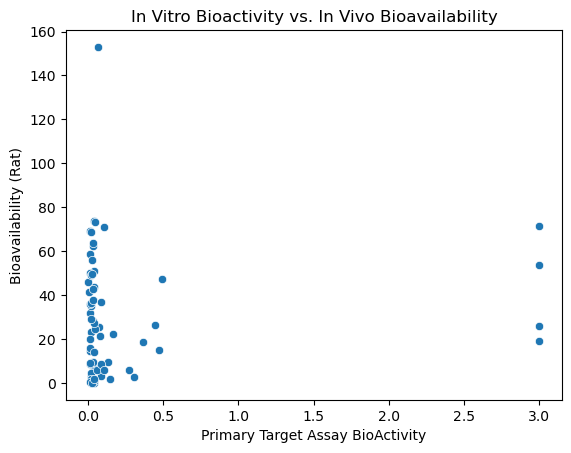

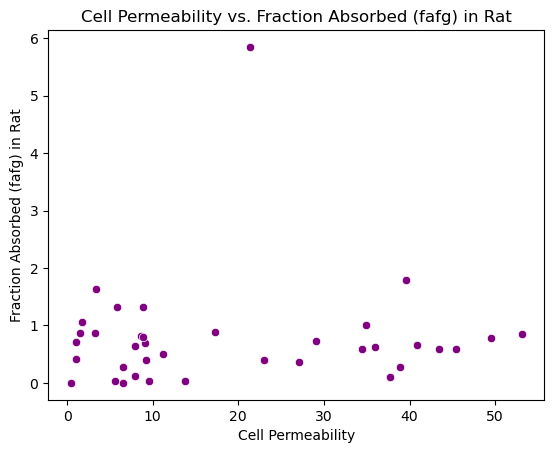

In [91]:
# Scatter plot for in vitro bioactivity vs. in vivo bioavailability
sns.scatterplot(data=pld_clean_df, x='Primary_Target_Assay_BioActivity', y='Bioavailability (Rat)')
plt.title('In Vitro Bioactivity vs. In Vivo Bioavailability')
plt.xlabel('Primary Target Assay BioActivity')
plt.ylabel('Bioavailability (Rat)')
plt.show()

# Scatter plot for cell permeability vs. fafg (Rat)
sns.scatterplot(data=pld_clean_df, x='Cell Permeability', y='fafg (Rat)', color='purple')
plt.title('Cell Permeability vs. Fraction Absorbed (fafg) in Rat')
plt.xlabel('Cell Permeability')
plt.ylabel('Fraction Absorbed (fafg) in Rat')
plt.show()

<div class="alert alert-block alert-warning">
    <font size=3 color=black>
        1) Both plots indicate a lack of strong correlation between the in vitro and in vivo properties analyzed. This suggests that factors other than those plotted might be influencing the in vivo outcomes.
<br>
    <br>    2) The presence of outliers in both plots warrants further investigation to understand the unique properties of these compounds that lead to their unusual bioavailability or absorption.
<br>
    <br>    3) Considering additional properties or performing multivariate analysis might help uncover hidden relationships. For instance, examining the interplay between multiple physicochemical properties and in vivo outcomes could provide more insights.
    </font>
</div>

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Prepare the feature set
features = pld_clean_df[['Primary_Target_Assay_BioActivity', 'Cell Permeability', 'TPSA', 'ClogP', 'LogD', 'Num_H_Donors', 
                         'Num_H_Acceptors']]

# Prepare the target sets, dropping rows with NaN values
target_bioavailability = pld_clean_df['Bioavailability (Rat)'].dropna()
target_fafg = pld_clean_df['fafg (Rat)'].dropna()

# Ensure that the features and target arrays have the same number of samples
features_bioavailability = features.loc[target_bioavailability.index].dropna()
target_bioavailability = target_bioavailability.loc[features_bioavailability.index]

features_fafg = features.loc[target_fafg.index].dropna()
target_fafg = target_fafg.loc[features_fafg.index]

# Split data for bioavailability model
X_train_bio, X_test_bio, y_train_bio, y_test_bio = train_test_split(features_bioavailability, target_bioavailability, 
                                                                    test_size=0.2, random_state=42)

# Split data for fafg model
X_train_fafg, X_test_fafg, y_train_fafg, y_test_fafg = train_test_split(features_fafg, target_fafg, test_size=0.2, 
                                                                        random_state=42)

# Train models
model_bio = LinearRegression().fit(X_train_bio, y_train_bio)
model_fafg = LinearRegression().fit(X_train_fafg, y_train_fafg)

# Predict and evaluate
predictions_bio = model_bio.predict(X_test_bio)
predictions_fafg = model_fafg.predict(X_test_fafg)

r2_bio = r2_score(y_test_bio, predictions_bio)
r2_fafg = r2_score(y_test_fafg, predictions_fafg)

print(f'R^2 Score for Bioavailability Model: {r2_bio}')
print(f'R^2 Score for fafg Model: {r2_fafg}')

R^2 Score for Bioavailability Model: -0.544417456774015
R^2 Score for fafg Model: -5.406982226744315


<div class="alert alert-block alert-warning">
    <font size=3 color=black>
        1) This suggests that the in vitro features selected (Primary Target Assay BioActivity, Cell Permeability, TPSA, ClogP, LogD, Num_H_Donors, Num_H_Acceptors) do not explain the variation in bioavailability in rats.
<br>
        <br> 2)This implies that the selected in vitro features do not explain the variability in the fraction absorbed in rats.
    </font>
</div>

<div style="background-color: #F0F5FE ;border: 2px solid #76a1fa ; padding: 10px">
    <font size=4 color=#061d49>
        <center>
            <b>
                Primary Potency and Selectivity (Off-Target Bioactivity)
            </b>
        </center>
    </font>
</div>

Distribution of pIC50 Values Across Off Target Genes

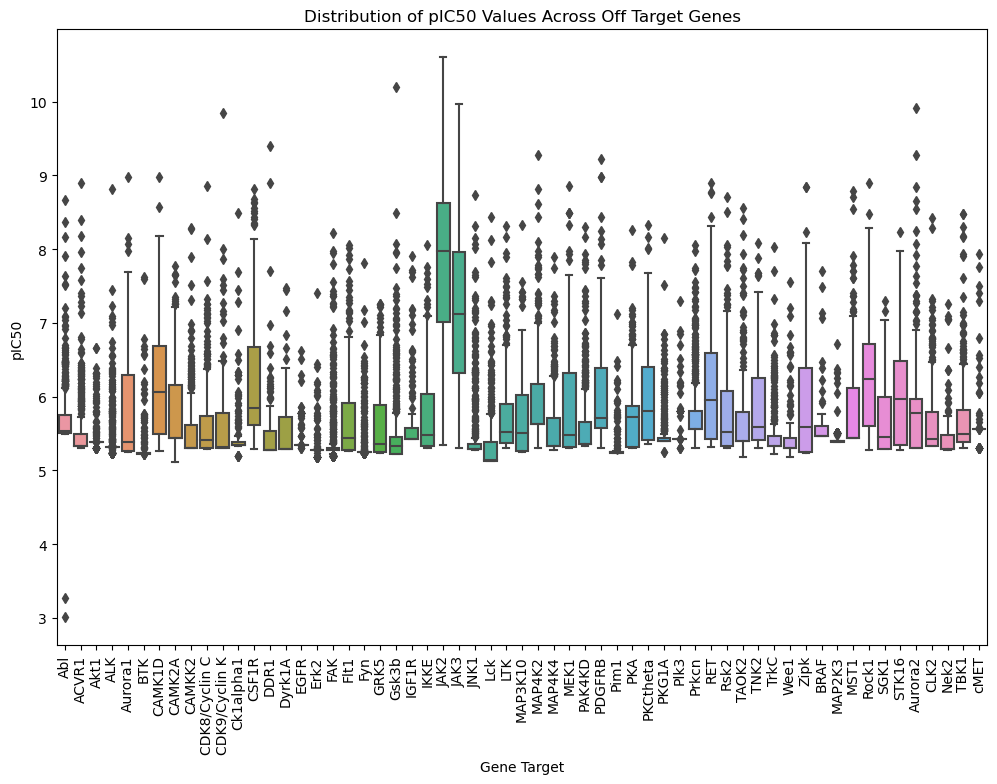

In [131]:
# Boxplot: pIC50 values for different targets
plt.figure(figsize=(12, 8))
sns.boxplot(data=compound_off_target_activity, x='Gene Target', y='pIC50')
plt.xlabel('Gene Target')
plt.ylabel('pIC50')
plt.title('Distribution of pIC50 Values Across Off Target Genes')
plt.xticks(rotation=90)
plt.show()

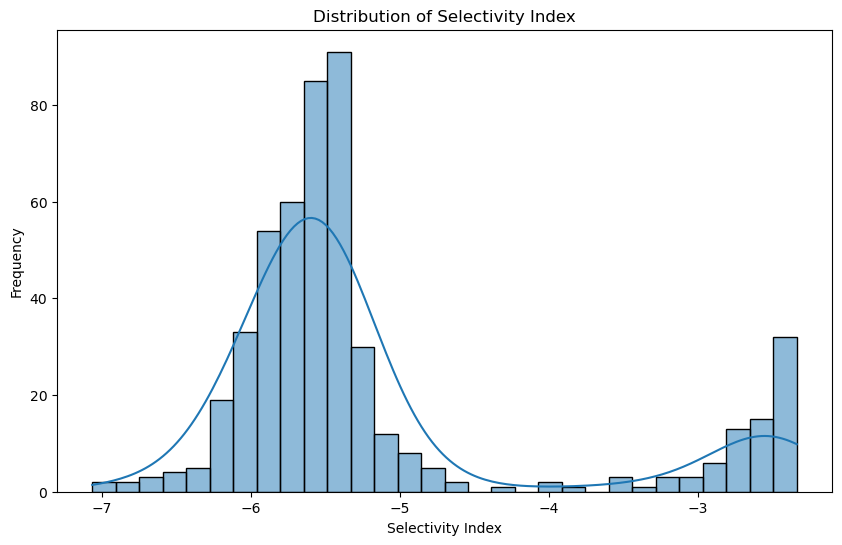

In [132]:
# Calculate selectivity index (primary pIC50 - average off-target pIC50)
primary_target_pIC50 = pld_clean_df[['CompoundID', 'Primary_Target_Assay_BioActivity']].rename(columns={'Primary_Target_Assay_BioActivity': 'Primary_pIC50'})
off_target_avg_pIC50 = compound_off_target_activity.groupby('CompoundID')['pIC50'].mean().reset_index().rename(columns={'pIC50': 'Avg_Off_Target_pIC50'})

selectivity_df = pd.merge(primary_target_pIC50, off_target_avg_pIC50, on='CompoundID')
selectivity_df['Selectivity_Index'] = selectivity_df['Primary_pIC50'] - selectivity_df['Avg_Off_Target_pIC50']

# Plot Selectivity Index
plt.figure(figsize=(10, 6))
sns.histplot(selectivity_df['Selectivity_Index'], bins=30, kde=True)
plt.xlabel('Selectivity Index')
plt.ylabel('Frequency')
plt.title('Distribution of Selectivity Index')
plt.show()

<div class="alert alert-block alert-warning">
    <font size=3 color=black>
        The above histogram indicates the following:
        <br>1) The negative skew of the Selectivity Index indicates that many compounds in the dataset have lower selectivity, meaning they tend to be less potent against their primary target compared to their average potency against off-targets.
        <br>2) The histogram suggests a need for optimization to improve selectivity. Compounds with a more positive Selectivity Index would be more desirable as they are more likely to be potent against their intended target while minimizing off-target interactions.
        <br>3) Compounds with the highest negative Selectivity Index might be candidates for exclusion or structural modification to enhance selectivity, while compounds closer to the less negative or near-zero Selectivity Index might be prioritized for further optimization and development.
    </font>
</div>

------------------------------------------------------------------------------------------------------------------------

Save Cleaned DataFrames Locally Incase Needed

In [42]:
pld_clean_df.to_csv(r'C:\Users\tktow\OneDrive\Documents\AbbVie Interview\CleanedDataFrames\pld_clean_df.csv', index=False)
compound_off_target_activity.to_csv(r'C:\Users\tktow\OneDrive\Documents\AbbVie Interview\CleanedDataFrames\compound_off_target_activity_df.csv', index=False)
gene_drug_adverse_event_relationships.to_csv(r'C:\Users\tktow\OneDrive\Documents\AbbVie Interview\CleanedDataFrames\gene_drug_adverse_event_relationships_df.csv', index=False)